In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv(r"C:\Users\aksha\OneDrive\Documents\Innomatics\links.csv")

In [3]:
df2=pd.read_csv(r"C:\Users\aksha\OneDrive\Documents\Innomatics\movies.csv")

In [4]:
df3=pd.read_csv(r"C:\Users\aksha\OneDrive\Documents\Innomatics\ratings.csv")

In [5]:
df4=pd.read_csv(r"C:\Users\aksha\OneDrive\Documents\Innomatics\tags.csv")

In [6]:
df1.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
df3.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
df4.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(9742, 3)
(9742, 3)
(100836, 4)
(3683, 4)


In [11]:
df3.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [12]:
movie_ratings_count = df3.groupby('movieId')['rating'].count()

max_rated_movie_id = movie_ratings_count.idxmax()
max_rated_movie_name = df2[df2['movieId'] == max_rated_movie_id]['title'].values[0]

print("Movie with the maximum number of ratings:")
print(max_rated_movie_name)

Movie with the maximum number of ratings:
Forrest Gump (1994)


In [13]:
matrix_movie_id = 2571
matrix_tags = df4[(df4['movieId'] == matrix_movie_id) & (df4['userId'].isin(df3['userId']))]['tag']

unique_matrix_tags = matrix_tags.unique()

print("Tags submitted by users to 'The Matrix (1999)':")
print(unique_matrix_tags)

Tags submitted by users to 'The Matrix (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [14]:
terminator_2_movie_id = 280

average_rating = df3[df3['movieId'] == terminator_2_movie_id]['rating'].mean()

print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")

Average user rating for 'Terminator 2: Judgment Day (1991)': 4.08


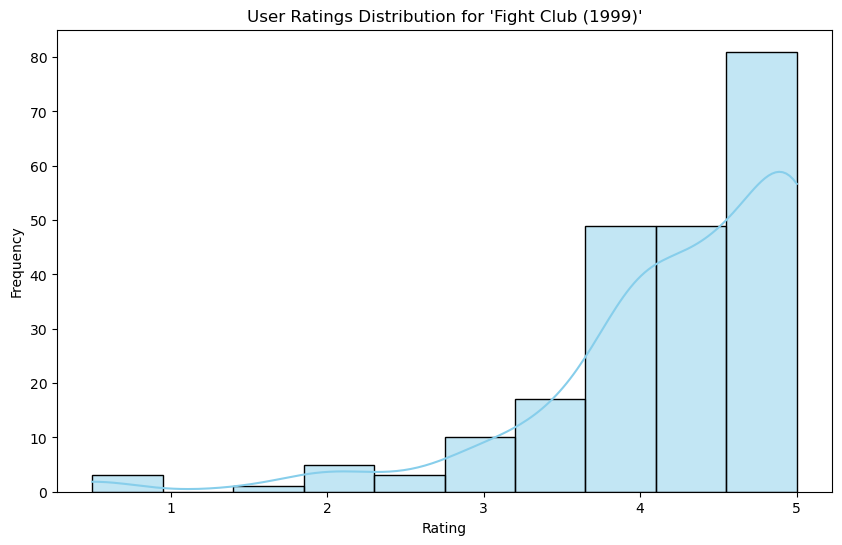

In [15]:
fight_club_movie_id = 2959

fight_club_ratings = df3[df3['movieId'] == fight_club_movie_id]['rating']

plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings, bins=10, kde=True, color='skyblue')
plt.title("User Ratings Distribution for 'Fight Club (1999)'")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [16]:
import pandas as pd
ratings_grouped = df3.groupby('movieId')['rating'].agg(['count', 'mean'])

merged_df = pd.merge(df2, ratings_grouped, on='movieId')

popular_movies_df = merged_df[merged_df['count'] > 50]

popular_movies_df = popular_movies_df.sort_values('mean', ascending=False)

most_popular_movie = popular_movies_df.iloc[0]

most_popular_movie_title = most_popular_movie['title']
most_popular_movie_rating = most_popular_movie['mean']

most_popular_movie_title, most_popular_movie_rating

('Shawshank Redemption, The (1994)', 4.429022082018927)

In [17]:
ratings_grouped = df3.groupby('movieId')['rating'].agg(count='size', mean='mean').reset_index()

merged_df = pd.merge(ratings_grouped, df2, on='movieId')

popular_movies_df = merged_df[merged_df['count'] > 50]

top_movies = popular_movies_df.sort_values('count', ascending=False).head(5)

top_movies_titles = top_movies[['title', 'count']]

top_movies_titles

,title,count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278


In [18]:
ratings_grouped = df3.groupby('movieId').size().reset_index(name='rating_count')

merged_df = pd.merge(df2, ratings_grouped, on='movieId')

scifi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

third_most_popular_scifi = scifi_movies.sort_values('rating_count', ascending=False).iloc[2]

third_most_popular_sci_fi_title = third_most_popular_scifi['title']
third_most_popular_sci_fi_title

'Jurassic Park (1993)'

In [19]:
df1

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0
